In [1]:
# lib import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns', 500)

In [4]:
cars=pd.read_csv('CarPrice_Assignment.csv')

In [5]:
cars.shape

(205, 26)

In [6]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [7]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
# missing value analysis
cars.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [9]:
# any duplicates?
cars[cars.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [10]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
# lets extract CarCompany from CarName

In [12]:
cars['CarCompany']=cars.CarName.str.split().str[0]
cars['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [13]:
# some car companies are mispelled 
cars['CarCompany']=cars.CarCompany.replace({'maxda':'mazda','Nissan':'nissan','porcshce':'porsche','toyouta':'toyota','vokswagen':'volkswagen','vw':'volkswagen'})
cars['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [14]:
cars.drop('CarName',axis=1, inplace=True)

In [15]:
# data visualization

In [16]:
# lets analyse the dependent variable price

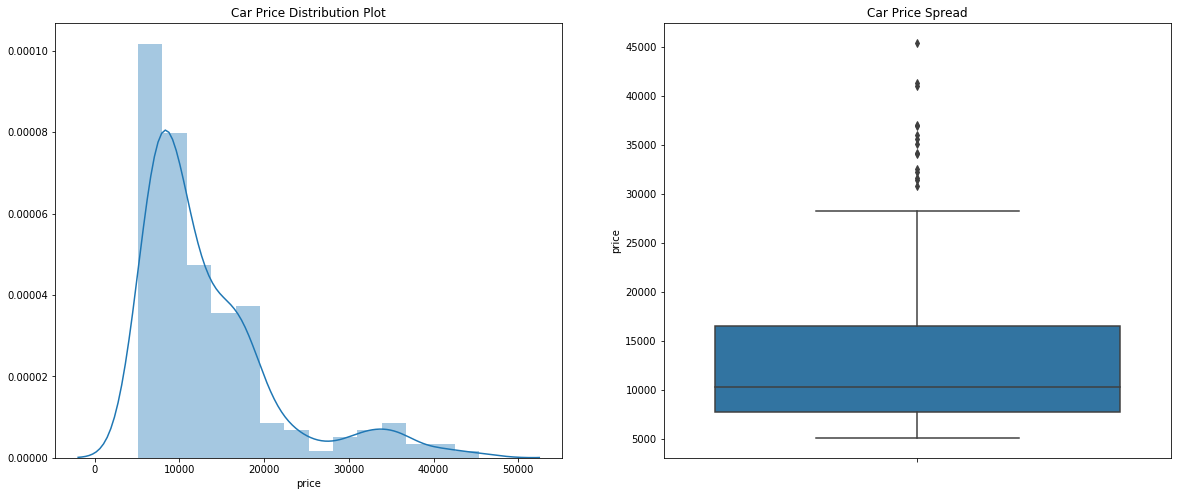

In [17]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)

plt.show()

In [18]:
cars.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1])


count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

In [19]:
# the distribution is right skewed as the mode is the peak and the median and mean follow to its right
# 75% of the distribution is below 16500 and the rest 25% rises to a max of 45000 i.e high variance in the car prices

In [20]:
# Categorical variables

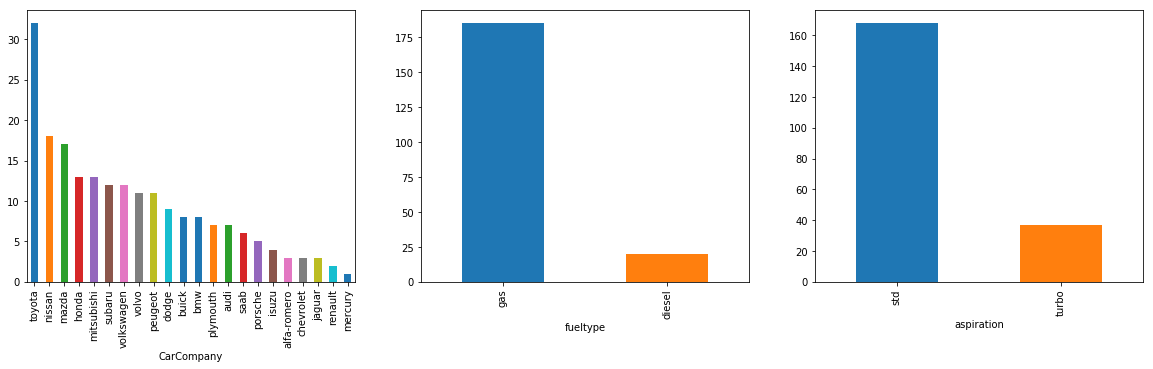

In [21]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
cars.groupby(by='CarCompany').CarCompany.count().sort_values(ascending=False).plot('bar')

plt.subplot(1,3,2)
cars.groupby(by='fueltype').fueltype.count().sort_values(ascending=False).plot('bar')

plt.subplot(1,3,3)
cars.groupby(by='aspiration').aspiration.count().sort_values(ascending=False).plot('bar')

plt.show()

In [22]:
# Toyota is the most selling brand 
# gas run cars are high compared to diesel
# std aspiration cars are more than turbo

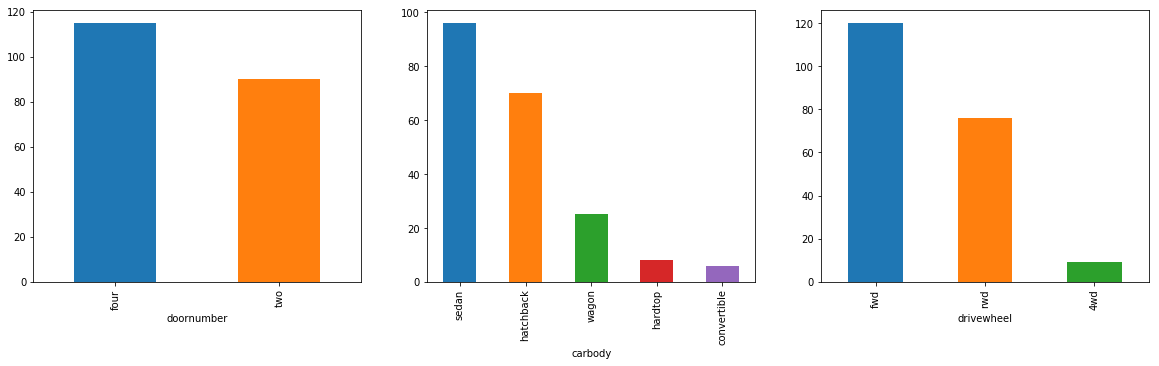

In [23]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
cars.groupby(by='doornumber').doornumber.count().sort_values(ascending=False).plot('bar')

plt.subplot(1,3,2)
cars.groupby(by='carbody').carbody.count().sort_values(ascending=False).plot('bar')

plt.subplot(1,3,3)
cars.groupby(by='drivewheel').drivewheel.count().sort_values(ascending=False).plot('bar')

plt.show()

In [24]:
# four door cars are more than two
# sedan is most preferred followed by hatchback
# fwd is more in number compared to 4wd followed bt rwd

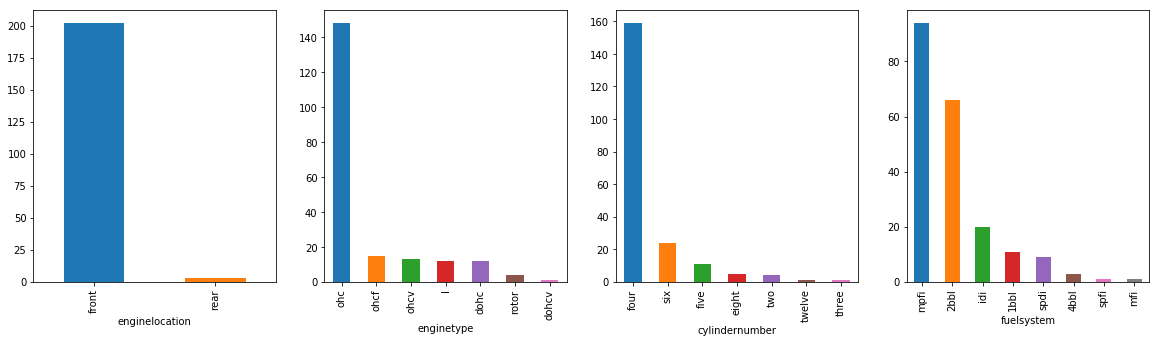

In [25]:
plt.figure(figsize=(20,5))

plt.subplot(1,4,1)
cars.groupby(by='enginelocation').enginelocation.count().sort_values(ascending=False).plot('bar')

plt.subplot(1,4,2)
cars.groupby(by='enginetype').enginetype.count().sort_values(ascending=False).plot('bar')

plt.subplot(1,4,3)
cars.groupby(by='cylindernumber').cylindernumber.count().sort_values(ascending=False).plot('bar')

plt.subplot(1,4,4)
cars.groupby(by='fuelsystem').fuelsystem.count().sort_values(ascending=False).plot('bar')

plt.show()

In [26]:
# cars with front enginelocation are more
# enginetype of ohc is almost the case in every car
# mostly every car has four cylinders
# fuelsystem of mpfi is very prominent 

In [27]:
# lets check the disttibution with price

In [28]:
# method to show variations with price

def plot_price_relation(var,plot_num):
    plt.subplot(1,3,plot_num)
    count=sns.boxplot(x=var,y='price',data=cars)
    count.set_xticklabels(count.get_xticklabels(), rotation=90)
    plt.title(var+' vs price')


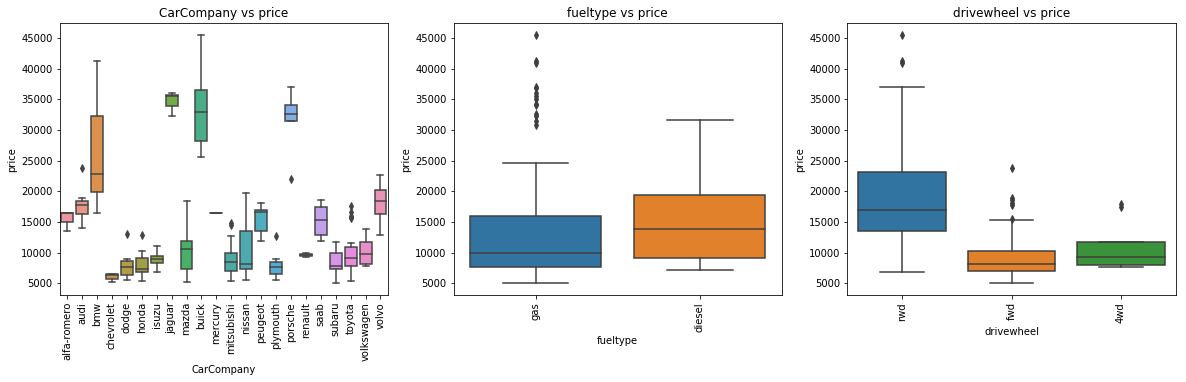

In [29]:
plt.figure(figsize=(20,5))

plot_price_relation('CarCompany',1)
plot_price_relation('fueltype',2)
plot_price_relation('drivewheel',3)

In [30]:
# Buick, Porsche, Jaguar and BMW are the luxury car brands(prices high)
# diesel cars are high priced
# rwd cars are high priced

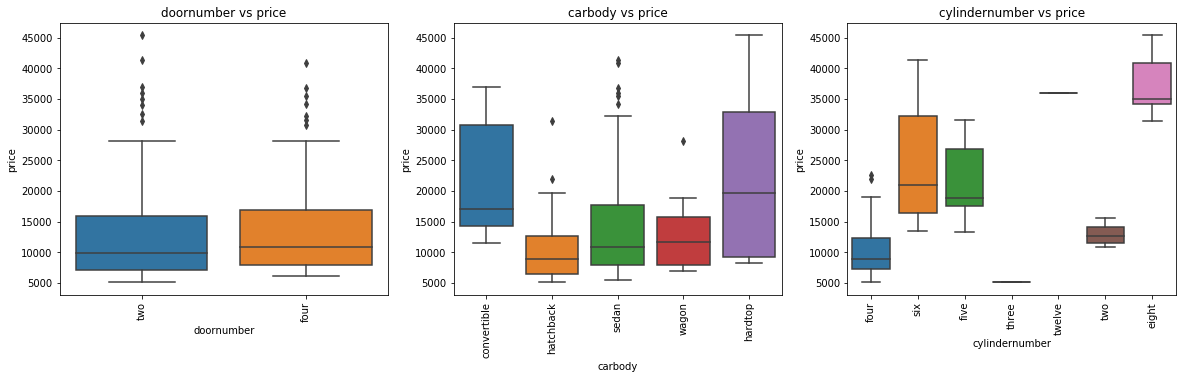

In [31]:
plt.figure(figsize=(20,5))

plot_price_relation('doornumber',1)
plot_price_relation('carbody',2)
plot_price_relation('cylindernumber',3)

In [32]:
# 2 and 4 door cars are almost equally priced while the later is slightly high
# hardtops and convertable are costly while hatchback are least costly
# 8 cylinder engines are costliest

In [33]:
# numerical variables

In [34]:
# method to show variations with price

def numerical_price_variation(var,plot_num):
    plt.subplot(1,2,plot_num)
    sns.regplot(x=var,y='price',data=cars)
    plt.title(var+' variation with price')


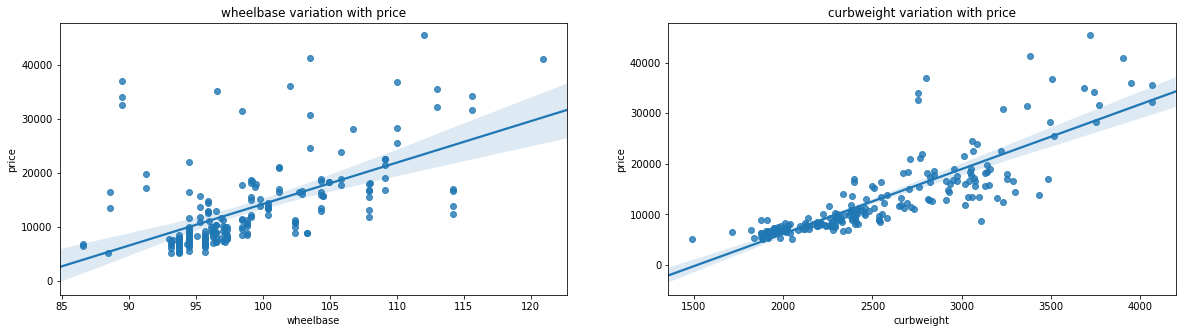

In [35]:
plt.figure(figsize=(20,5))

numerical_price_variation('wheelbase',1)
numerical_price_variation('curbweight',2)


In [36]:
# wheelbase is clusttered around 93-100 and increases steadily with price
# curbweight has a positive corelation with price

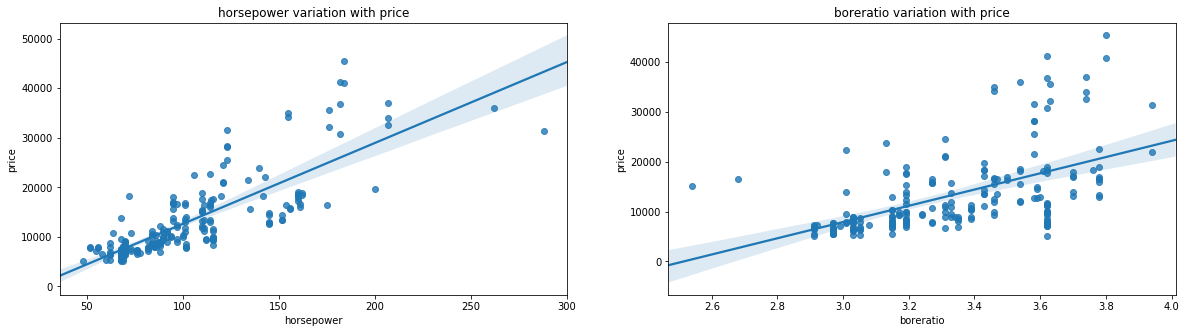

In [37]:
plt.figure(figsize=(20,5))

numerical_price_variation('horsepower',1)
numerical_price_variation('boreratio',2)


In [38]:
# horsepower varies from 50-150 mostly and increases with price
# boreratio increases with price

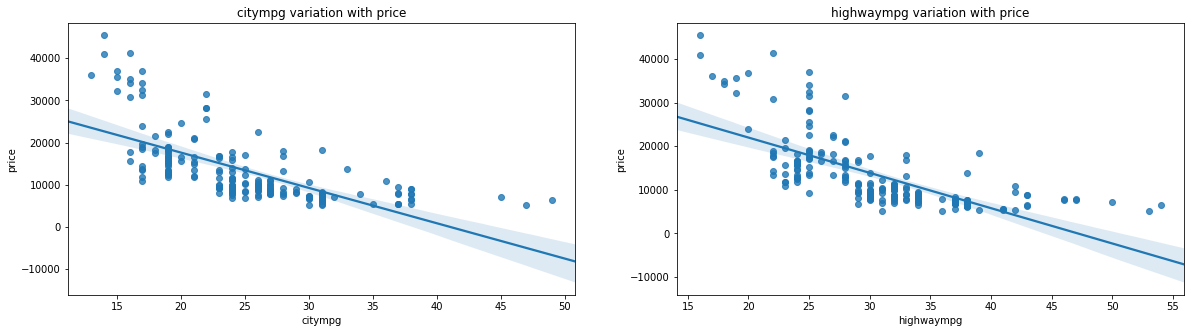

In [39]:
plt.figure(figsize=(20,5))

numerical_price_variation('citympg',1)
numerical_price_variation('highwaympg',2)

In [40]:
# citympg and highwaympg decrease with increse in price

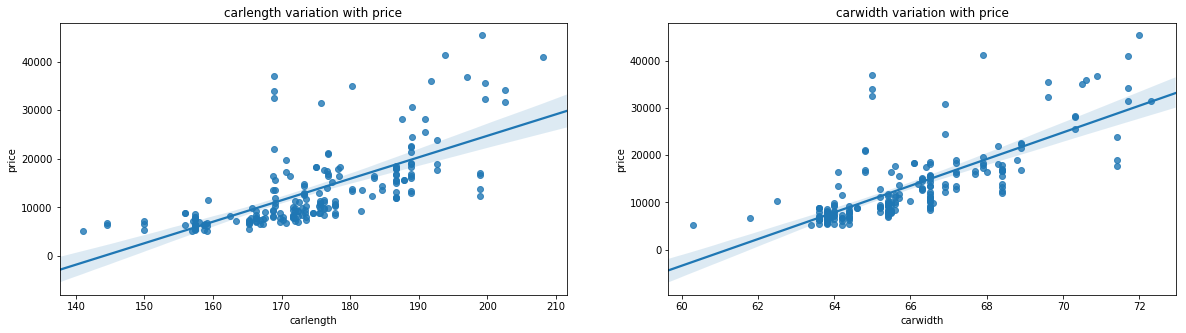

In [41]:
plt.figure(figsize=(20,5))

numerical_price_variation('carlength',1)
numerical_price_variation('carwidth',2)

In [42]:
# carlength and carwidth increse with increse in price

In [43]:
# feature engineering

In [44]:
# total_milege
cars['total_milege']=cars.citympg+cars.highwaympg

In [45]:
# lets analyse price again
cars.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1])

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
85%      18500.000000
90%      22563.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64

In [46]:
# segregate cars according to the price range as lowend, highend, luxury 
cars['price'] = cars['price'].astype('int')
temp = cars.copy()
company_avg = temp.groupby(['CarCompany']).price.mean()
temp = temp.merge(company_avg.reset_index(), how='left',on='CarCompany')
bins = [0,10000,20000,40000]
cars_bin=['lowend','highend','luxury']
cars['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)

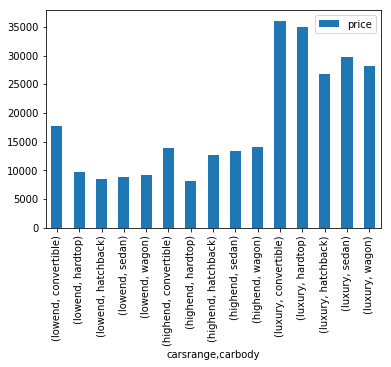

In [47]:
df=pd.DataFrame(cars.groupby(by=['carsrange','carbody']).price.mean())
df.plot.bar()

In [48]:
# clearly convertables are high priced over all ranges 

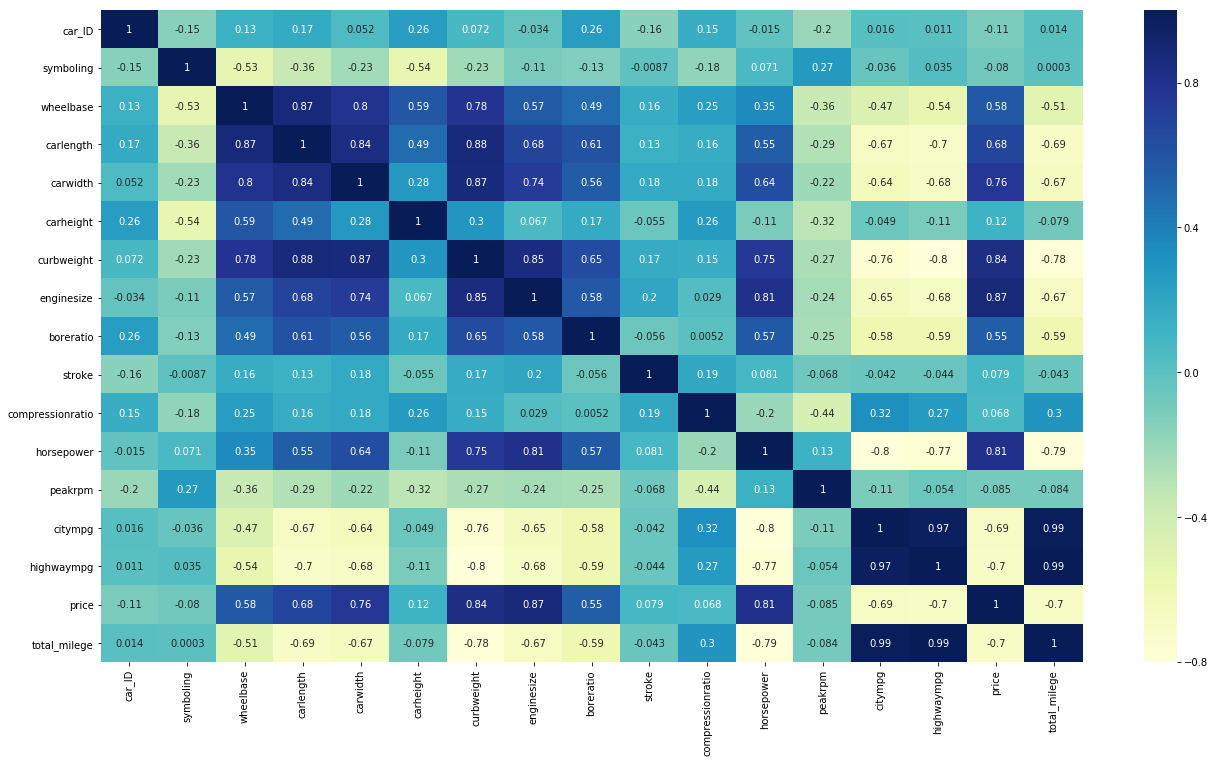

In [49]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (22, 12))
sns.heatmap(cars.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [50]:
# list of significant variables for modeling from visual knowledge above

In [51]:
# carsrange
# fueltype
# aspiration
# carbody
# enginelocation
# enginetype
# cylindernumber
# fuelsystem
# curbweight
# wheelbase
# horsepower
# boreratio
# total_milege
# drivewheel
# carlength
# carwidth

In [52]:
# data cleaning
cars_lr=cars[['carsrange','fueltype','aspiration','carbody','enginelocation','enginetype','cylindernumber','fuelsystem'
              ,'curbweight','wheelbase','horsepower','boreratio','total_milege','drivewheel','carlength','carwidth','price']]

In [53]:
# lets create dummies for nominal categorical variables
# enginetype
engTyp=pd.get_dummies(cars_lr.enginetype, drop_first=True)
cars_lr=pd.concat([cars_lr,engTyp],axis=1)
# fuelsystem
ful=pd.get_dummies(cars_lr.fuelsystem, drop_first=True)
cars_lr=pd.concat([cars_lr,ful],axis=1)
# carbody
body=pd.get_dummies(cars_lr.carbody, drop_first=True)
cars_lr=pd.concat([cars_lr,body],axis=1)
# cylindernumber
c=pd.get_dummies(cars_lr.cylindernumber, drop_first=True)
cars_lr=pd.concat([cars_lr,c],axis=1)
# fueltype
f=pd.get_dummies(cars_lr.fueltype, drop_first=True)
cars_lr=pd.concat([cars_lr,f],axis=1)
# drivewheel
d=pd.get_dummies(cars_lr.drivewheel, drop_first=True)
cars_lr=pd.concat([cars_lr,d],axis=1)
# enginelocation
e=pd.get_dummies(cars_lr.enginelocation, drop_first=True)
cars_lr=pd.concat([cars_lr,e],axis=1)
# aspiration
a=pd.get_dummies(cars_lr.aspiration, drop_first=True)
cars_lr=pd.concat([cars_lr,a],axis=1)
# carsrange
c=pd.get_dummies(cars_lr.carsrange, drop_first=True)
cars_lr=pd.concat([cars_lr,c],axis=1)

# lets drop these variables
cars_lr.drop(['enginetype','fuelsystem','carbody','cylindernumber','fueltype','drivewheel','enginelocation','aspiration','carsrange'],axis=1,inplace=True)

In [54]:
cars_lr.head()

,curbweight,wheelbase,horsepower,boreratio,total_milege,carlength,carwidth,price,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,hardtop,hatchback,sedan,wagon,five,four,six,three,twelve,two,gas,fwd,rwd,rear,turbo,highend,luxury
0,2548,88.6,111,3.47,48,168.8,64.1,13495,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0
1,2548,88.6,111,3.47,48,168.8,64.1,16500,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0
2,2823,94.5,154,2.68,45,171.2,65.5,16500,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0
3,2337,99.8,102,3.19,54,176.6,66.2,13950,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0
4,2824,99.4,115,3.19,40,176.6,66.4,17450,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0


In [55]:
# data split

In [56]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(cars_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [57]:
# scaling values

In [58]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

# Apply scaler() to all the columns except the 'dummy' variables
num_vars = ['wheelbase', 'carlength','carwidth','curbweight','boreratio',
            'horsepower','total_milege','price']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [59]:
df_train.head()

,curbweight,wheelbase,horsepower,boreratio,total_milege,carlength,carwidth,price,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,hardtop,hatchback,sedan,wagon,five,four,six,three,twelve,two,gas,fwd,rwd,rear,turbo,highend,luxury
122,0.272692,0.244828,0.083333,0.230159,0.534247,0.426016,0.291667,0.068818,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0
125,0.500388,0.272414,0.395833,1.000000,0.219178,0.452033,0.666667,0.466890,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1
166,0.314973,0.272414,0.266667,0.444444,0.342466,0.448780,0.308333,0.122110,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0
1,0.411171,0.068966,0.262500,0.626984,0.246575,0.450407,0.316667,0.314446,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0
199,0.647401,0.610345,0.475000,0.746032,0.123288,0.775610,0.575000,0.382131,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0


In [60]:
df_train.describe()

,curbweight,wheelbase,horsepower,boreratio,total_milege,carlength,carwidth,price,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,hardtop,hatchback,sedan,wagon,five,four,six,three,twelve,two,gas,fwd,rwd,rear,turbo,highend,luxury
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.407878,0.411141,0.227302,0.497946,0.359805,0.525476,0.461655,0.219309,0.006993,0.062937,0.685315,0.083916,0.062937,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.020979,0.342657,0.475524,0.132867,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.909091,0.594406,0.349650,0.006993,0.181818,0.412587,0.118881
std,0.211269,0.205581,0.165511,0.207140,0.186087,0.204848,0.184517,0.215682,0.083624,0.243703,0.466023,0.278236,0.243703,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.143818,0.476266,0.501156,0.340624,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.288490,0.492733,0.478536,0.083624,0.387050,0.494030,0.324786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.245539,0.272414,0.091667,0.305556,0.205479,0.399187,0.304167,0.067298,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.355702,0.341379,0.191667,0.500000,0.342466,0.502439,0.425000,0.140343,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.559542,0.503448,0.283333,0.682540,0.513699,0.669919,0.550000,0.313479,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
# model - 1

In [62]:
# divide X and y variables
y_train = df_train.pop('price')
X_train = df_train

In [63]:
# lets see what RFE 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [64]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('curbweight', True, 1),
 ('wheelbase', True, 1),
 ('horsepower', True, 1),
 ('boreratio', False, 7),
 ('total_milege', True, 1),
 ('carlength', False, 9),
 ('carwidth', True, 1),
 ('dohcv', True, 1),
 ('l', False, 12),
 ('ohc', False, 3),
 ('ohcf', False, 4),
 ('ohcv', False, 8),
 ('rotor', False, 20),
 ('2bbl', False, 19),
 ('4bbl', False, 13),
 ('idi', False, 21),
 ('mfi', False, 22),
 ('mpfi', False, 14),
 ('spdi', False, 5),
 ('spfi', False, 23),
 ('hardtop', True, 1),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('five', False, 2),
 ('four', True, 1),
 ('six', True, 1),
 ('three', False, 6),
 ('twelve', True, 1),
 ('two', False, 17),
 ('gas', False, 18),
 ('fwd', False, 11),
 ('rwd', False, 15),
 ('rear', True, 1),
 ('turbo', False, 16),
 ('highend', False, 10),
 ('luxury', True, 1)]

In [65]:
features=X_train.columns[rfe.support_]
features

Index(['curbweight', 'wheelbase', 'horsepower', 'total_milege', 'carwidth',
       'dohcv', 'hardtop', 'hatchback', 'sedan', 'wagon', 'four', 'six',
       'twelve', 'rear', 'luxury'],
      dtype='object')

In [66]:
# build a model using statsmodel
import statsmodels.api as sm

X_train_m1=X_train[features]
# add constant
X_train_m1_coeff=sm.add_constant(X_train_m1)
lr1=sm.OLS(y_train,X_train_m1_coeff).fit()

print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     130.8
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.61e-69
Time:                        08:30:26   Log-Likelihood:                 217.17
No. Observations:                 143   AIC:                            -402.3
Df Residuals:                     127   BIC:                            -354.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0114      0.049      0.235   

In [67]:
# lets see the VIF for multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif= pd.DataFrame()
features=X_train_m1.columns
X = X_train_m1
vif['Features']=features
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,56.94
4,carwidth,53.85
1,wheelbase,33.93
2,horsepower,30.80
8,sedan,17.94
3,total_milege,14.65
7,hatchback,11.90
10,four,9.71
9,wagon,5.22
11,six,3.59


In [68]:
# model - 2

In [69]:
# lets drop six as it has high p value 
X_train_m2=X_train_m1.drop('six',axis=1)

In [70]:
# rebuild the model

X_train_m2_coeff=sm.add_constant(X_train_m2)
lr2=sm.OLS(y_train,X_train_m2_coeff).fit()

print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     140.5
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.86e-70
Time:                        08:30:26   Log-Likelihood:                 216.79
No. Observations:                 143   AIC:                            -403.6
Df Residuals:                     128   BIC:                            -359.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0128      0.049      0.262   

In [71]:
# lets see the VIF for multicolinearity

vif= pd.DataFrame()
features=X_train_m2.columns
X = X_train_m2
vif['Features']=features
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,56.65
4,carwidth,43.04
1,wheelbase,31.98
2,horsepower,23.31
8,sedan,17.90
3,total_milege,12.88
7,hatchback,11.89
10,four,6.63
9,wagon,5.21
6,hardtop,2.23


In [72]:
# model - 3

In [73]:
# lets drop wheelbase for high p value 
X_train_m3=X_train_m2.drop('wheelbase',axis=1)

In [74]:
# rebuild the model

X_train_m3_coeff=sm.add_constant(X_train_m3)
lr3=sm.OLS(y_train,X_train_m3_coeff).fit()

print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.932
Method:                 Least Squares   F-statistic:                     149.6
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.55e-71
Time:                        08:30:27   Log-Likelihood:                 215.54
No. Observations:                 143   AIC:                            -403.1
Df Residuals:                     129   BIC:                            -361.6
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           -0.0062      0.047     -0.131   

In [75]:
# lets see the VIF for multicolinearity

vif= pd.DataFrame()
features=X_train_m3.columns
X = X_train_m3
vif['Features']=features
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,40.86
3,carwidth,36.96
1,horsepower,16.71
7,sedan,14.40
2,total_milege,11.89
6,hatchback,10.41
9,four,6.60
8,wagon,4.47
12,luxury,2.13
5,hardtop,2.09


In [76]:
# model - 4

In [77]:
# lets drop total_milege for high p value
X_train_m4=X_train_m3.drop('total_milege',axis=1)

In [78]:
# rebuild the model

X_train_m4_coeff=sm.add_constant(X_train_m4)
lr4=sm.OLS(y_train,X_train_m4_coeff).fit()

print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     158.4
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.20e-71
Time:                        08:30:28   Log-Likelihood:                 213.50
No. Observations:                 143   AIC:                            -401.0
Df Residuals:                     130   BIC:                            -362.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0482      0.038      1.262      0.2

In [79]:
# lets see the VIF for multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif= pd.DataFrame()
features=X_train_m4.columns
X = X_train_m4
vif['Features']=features
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,40.75
2,carwidth,36.96
1,horsepower,14.50
6,sedan,8.26
5,hatchback,5.52
8,four,5.47
7,wagon,3.20
11,luxury,2.08
4,hardtop,1.82
10,rear,1.77


In [80]:
# model - 5

In [81]:
# lets drop twelve for high p value 
X_train_m5=X_train_m4.drop('twelve',axis=1)

In [82]:
# rebuild the model

X_train_m5_coeff=sm.add_constant(X_train_m5)
lr5=sm.OLS(y_train,X_train_m5_coeff).fit()

print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     173.7
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           1.89e-72
Time:                        08:30:28   Log-Likelihood:                 213.33
No. Observations:                 143   AIC:                            -402.7
Df Residuals:                     131   BIC:                            -367.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0514      0.038      1.364      0.1

In [83]:
# lets see the VIF for multicolinearity

vif= pd.DataFrame()
features=X_train_m5.columns
X = X_train_m5
vif['Features']=features
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,curbweight,39.85
2,carwidth,36.95
1,horsepower,12.54
6,sedan,8.23
5,hatchback,5.43
8,four,5.42
7,wagon,3.19
10,luxury,2.04
4,hardtop,1.81
9,rear,1.73


In [84]:
# model - 6

In [85]:
# lets drop curbweight due to high VIF 
X_train_m6=X_train_m5.drop('curbweight',axis=1)

In [86]:
# rebuild the model

X_train_m6_coeff=sm.add_constant(X_train_m6)
lr6=sm.OLS(y_train,X_train_m6_coeff).fit()

print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     168.7
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           4.39e-70
Time:                        08:30:29   Log-Likelihood:                 204.51
No. Observations:                 143   AIC:                            -387.0
Df Residuals:                     132   BIC:                            -354.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0645      0.040      1.620      0.1

In [87]:
# lets see the VIF for multicolinearity

vif= pd.DataFrame()
features=X_train_m6.columns
X = X_train_m6
vif['Features']=features
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,carwidth,15.99
0,horsepower,8.72
5,sedan,8.18
7,four,5.42
4,hatchback,5.24
6,wagon,3.09
9,luxury,1.93
3,hardtop,1.81
8,rear,1.69
2,dohcv,1.23


In [88]:
# model - 7

In [89]:
# lets drop carwidth due to high VIF 
X_train_m7=X_train_m6.drop('carwidth',axis=1)

In [90]:
# rebuild the model

X_train_m7_coeff=sm.add_constant(X_train_m7)
lr7=sm.OLS(y_train,X_train_m7_coeff).fit()

print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     100.3
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           7.68e-55
Time:                        08:30:30   Log-Likelihood:                 163.69
No. Observations:                 143   AIC:                            -307.4
Df Residuals:                     133   BIC:                            -277.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1821      0.050      3.610      0.0

In [91]:
# lets see the VIF for multicolinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor 

vif= pd.DataFrame()
features=X_train_m7.columns
X = X_train_m7
vif['Features']=features
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,sedan,5.79
6,four,5.39
0,horsepower,5.18
3,hatchback,4.32
5,wagon,2.42
8,luxury,1.86
2,hardtop,1.77
7,rear,1.60
1,dohcv,1.23


In [92]:
# model - 8

In [93]:
# lets drop hardtop due to high p value 
X_train_m8=X_train_m7.drop('hardtop',axis=1)

In [94]:
# rebuild the model

X_train_m8_coeff=sm.add_constant(X_train_m8)
lr8=sm.OLS(y_train,X_train_m8_coeff).fit()

print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     111.5
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.15e-55
Time:                        08:30:31   Log-Likelihood:                 162.48
No. Observations:                 143   AIC:                            -307.0
Df Residuals:                     134   BIC:                            -280.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1463      0.045      3.272      0.0

In [95]:
# lets see the VIF for multicolinearity

vif= pd.DataFrame()
features=X_train_m8.columns
X = X_train_m8
vif['Features']=features
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,sedan,5.10
0,horsepower,4.79
5,four,4.71
2,hatchback,3.83
4,wagon,2.20
7,luxury,1.86
1,dohcv,1.22
6,rear,1.19


In [96]:
# model - 9

In [97]:
# lets drop rear for high p value 
X_train_m9=X_train_m8.drop('rear',axis=1)

In [98]:
# rebuild the model

X_train_m9_coeff=sm.add_constant(X_train_m9)
lr9=sm.OLS(y_train,X_train_m9_coeff).fit()

print(lr9.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     127.6
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.55e-56
Time:                        08:30:32   Log-Likelihood:                 162.12
No. Observations:                 143   AIC:                            -308.2
Df Residuals:                     135   BIC:                            -284.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1388      0.044      3.175      0.0

In [99]:
# lets see the VIF for multicolinearity

vif= pd.DataFrame()
features=X_train_m9.columns
X = X_train_m9
vif['Features']=features
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,sedan,4.65
5,four,4.52
0,horsepower,4.41
2,hatchback,3.59
4,wagon,2.10
6,luxury,1.81
1,dohcv,1.19


In [100]:
# model - 10

In [101]:
# lets drop sedan for high p and VIF value
X_train_m10=X_train_m9.drop('sedan',axis=1)

In [102]:
# rebuild the model

X_train_m10_coeff=sm.add_constant(X_train_m10)
lr10=sm.OLS(y_train,X_train_m10_coeff).fit()

print(lr10.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     149.3
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.64e-57
Time:                        08:30:32   Log-Likelihood:                 161.83
No. Observations:                 143   AIC:                            -309.7
Df Residuals:                     136   BIC:                            -288.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1140      0.028      4.019      0.0

In [103]:
# lets see the VIF for multicolinearity

vif= pd.DataFrame()
features=X_train_m10.columns
X = X_train_m10
vif['Features']=features
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,2.76
4,four,1.91
5,luxury,1.79
2,hatchback,1.64
3,wagon,1.26
1,dohcv,1.14


In [104]:
# model - 11

In [105]:
# lets drop wagon for high p value 
X_train_m11=X_train_m10.drop('wagon',axis=1)

In [106]:
# rebuild the model

X_train_m11_coeff=sm.add_constant(X_train_m11)
lr11=sm.OLS(y_train,X_train_m11_coeff).fit()

print(lr11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.863
Method:                 Least Squares   F-statistic:                     180.0
Date:                Mon, 15 Jul 2019   Prob (F-statistic):           2.13e-58
Time:                        08:30:33   Log-Likelihood:                 161.69
No. Observations:                 143   AIC:                            -311.4
Df Residuals:                     137   BIC:                            -293.6
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1119      0.028      3.996      0.0

In [107]:
# lets see the VIF for multicolinearity

vif= pd.DataFrame()
features=X_train_m11.columns
X = X_train_m11
vif['Features']=features
vif['VIF']=[variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,horsepower,2.66
4,luxury,1.78
3,four,1.72
2,hatchback,1.52
1,dohcv,1.14


Text(0.5,0,'Errors')

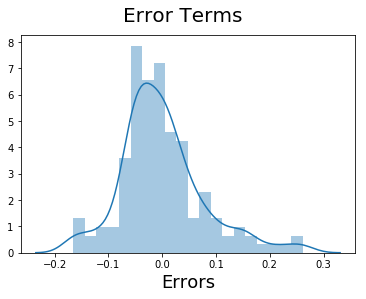

In [108]:
y_train_price = lr11.predict(X_train_m11_coeff)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)   

In [109]:
# The error terms have a normal distribution with mean at 0 which is exactly our assumtion 

In [110]:
# Making pridictions

In [111]:
df_test[num_vars] = scaler.transform(df_test[num_vars])

In [112]:
y_test = df_test.pop('price')
X_test = df_test

In [113]:
df_test.head()

,curbweight,wheelbase,horsepower,boreratio,total_milege,carlength,carwidth,dohcv,l,ohc,ohcf,ohcv,rotor,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,hardtop,hatchback,sedan,wagon,five,four,six,three,twelve,two,gas,fwd,rwd,rear,turbo,highend,luxury
160,0.235066,0.313793,0.091667,0.404762,0.753425,0.409756,0.341667,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0
186,0.305275,0.368966,0.154167,0.404762,0.424658,0.497561,0.433333,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0
59,0.347944,0.420690,0.150000,0.563492,0.383562,0.596748,0.516667,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0
165,0.301396,0.272414,0.266667,0.444444,0.342466,0.448780,0.308333,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0
140,0.291699,0.231034,0.104167,0.746032,0.369863,0.263415,0.291667,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0


In [114]:
# Now let's use our model to make predictions.
from sklearn.metrics import r2_score

# model -5

# Creating X_test_new dataframe by dropping variables from X_test
X_test_m11 = X_test[X_train_m11.columns]

# Adding a constant variable 
X_test_m11_coeff = sm.add_constant(X_test_m11)

# Making predictions
y_pred_m11 = lr11.predict(X_test_m11_coeff)

r_squared_m11 = r2_score(y_test, y_pred_m11)
r_squared_m11

0.8648265323203235

Text(0,0.5,'y_pred_m11')

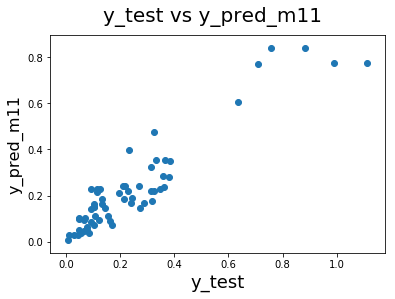

In [115]:
# Plotting y_test and y_pred_m5 to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_m11)
fig.suptitle('y_test vs y_pred_m11', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred_m11', fontsize=16)  

In [116]:
# error terms follow a constant variance which is according our assumption

In [117]:
# Model - 11:

# Training

# R-squared -86.8%
# Adj. R-squared -86.3%

# Testing

# r2_score -86.4%


In [118]:
# The model explains 86% of variance in the data
# The prob F-statistic of 2.13e-58 (0.0) explains that the 86% variance explained is not by chance
# The model has p values less the 0.05 significance level hence all features are statistically significant